# CHAPTER 11: Proximal Operator

### This code runs simulations for Examples 6 and 7 and generates figures 2, 3, and 4 from Chapter 11: Proximal Operator (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions:

1. soft_treshold

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from soft_threshold import soft_threshold

## Example 11.6 (Logistic cost function)

Consider a situation where $E(w)$ is chosen as the logistic loss function, i.e.,

$$
E(w)\;=\;\ln\left(1+e^{-\gamma h^{\sf T} w}\right) \tag{11.58}
$$

where $\gamma\in\mathbb{R}$ and $h\in\mathbb{R}^{M}$. Note that we are using here the notation $h$ to refer to the column vectors that appear in the exponent expression; this is in line with our future notation for feature vectors in subsequent chapters. Let 

$$
q(w)=\alpha \|w\|_1+{\rho\over 2}\|w\|^2 \tag{11.59}
$$

so that the function that we wish to minimize is

$$
P(w)=\alpha\|w\|_1+\frac{\rho}{2}\|w\|^2+\ln\left(1+e^{-\gamma h^{\sf T} w}\right) \tag{11.60}
$$

The function $E(w)$ is differentiable everywhere with

$$
\nabla_{w^{\sf T}}\,E(w)\;=\;-\gamma h\times \frac{1}{1+e^{\gamma h^{\sf T}w}} \tag{11.61}
$$ 

and we find that the proximal gradient recursion ($11.53$) reduces to

$$
\left\{\begin{array}{l} z_{n}=w_{n-1}\;+\;\mu\gamma h\times \frac{1}{1+e^{\gamma h^{\sf T} w_{n-1}}}\\
w_{n}= \mathbb{T}_{{\mu\alpha\over 1+\mu\rho}}\left(\dfrac{z_n}{1+\mu\rho}\right)
\end{array}\right. \tag{11.62}
$$

initial random condition
step size 
 0.01
number of iterations 
 500
alpha 
 0.2
rho 
 2
limit point from proximate gradient iteration and from mesh 

0.0781855041599353 0.2564114781264632 
 0.08000000000000185 0.260000000000002
limit value from proximal gradient iteration and from mesh 

0.579462517869979 0.5794879504858856


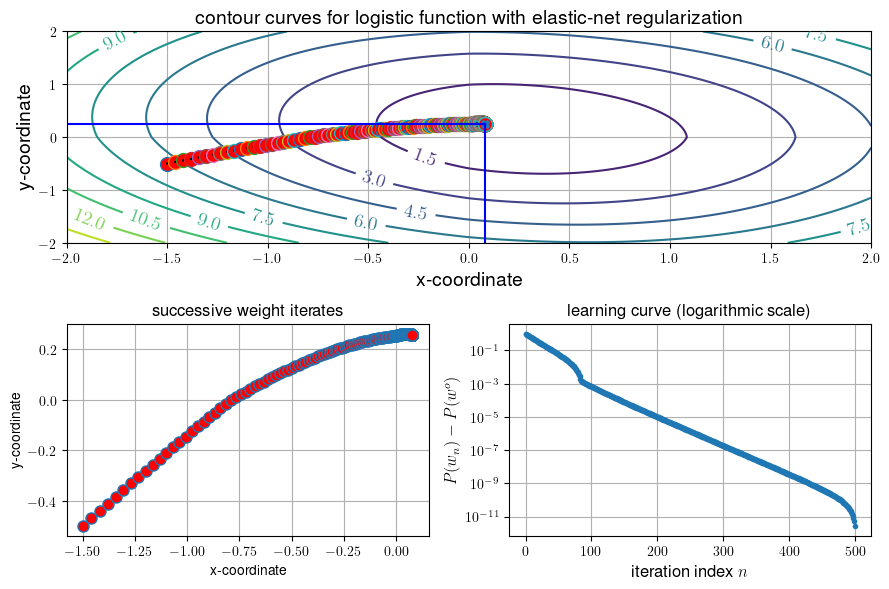

In [21]:
# logistic function with elastic net regularization
# P(w) = alpha\|w\|_1 + (rho/2) \|w\|^2 + ln(1+exp(-gamma h'w);

rho = 2     # l2-regularization parameter
alpha = 0.2 # l1-regularization parameter
gamma = 1
h = np.array([1, 2]).reshape(-1, 1)

# evaluating the logistic risk for plotting purposes
k = -1
step = 0.01
min_value_logistic = 1000
g = np.zeros([int((4+step)/step+1),int((4+step)/step+1)])

for w1 in np.arange(-2, 2+step, step):
   k = k+1
   m = -1
   for w2 in np.arange(-2, 2+step, step):
      m = m+1
      w = np.array([w1, w2]).reshape(-1, 1)
      a = np.exp(-gamma * np.dot(h.T, w))
      g[k,m] = alpha * np.linalg.norm(w, 1) + (rho / 2) * np.linalg.norm(w) ** 2 + np.log(1 + a)
      if g[k,m] <= min_value_logistic:
          min_value_logistic = g[k,m]
          w_min_logistic = np.array([w1, w2]).reshape(-1, 1)
    
##figure 2 (contour curves for regularized logistic risk)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

fig = plt.figure(figsize=(9,6))

ax1 = fig.add_subplot(211)
contour = ax1.contour(np.arange(-2, 2+step, step), np.arange(-2, 2+step, step), g, levels=10)
ax1.clabel(contour, fontsize=14, inline=True)
ax1.set_xlabel(r'x-coordinate', fontsize=14)
ax1.set_ylabel(r'y-coordinate', fontsize=14)
ax1.set_title('contour curves for logistic function with elastic-net regularization', fontsize=14)
ax1.grid(True)

## Running proximal gradient algorithm
print('initial random condition')
w=3*np.array([np.random.rand()-1, np.random.rand()-1]).reshape(-1, 1) # random initialization

mu = 0.01
N = 500 # number of iterations

Wx = np.zeros(N).reshape(-1,1) # save x-coordinates of weight vectors
Wy = np.zeros(N).reshape(-1,1) # save y-coordinates
P = np.zeros (N).reshape(-1,1) # learning curve

for n in range(N):
    Wx[n] = w[0]
    Wy[n] = w[1]
    ax1.plot(w[0], w[1], 'o', markerfacecolor='r', markersize=10)
    
    pw = w.copy()
    P[n] = alpha * np.linalg.norm(w, 1) + (rho / 2) * np.linalg.norm(w) ** 2 + np.log(1 + np.exp(-gamma * np.dot(h.T, w))) # learning curve
    
    a = 1 + np.exp(gamma * np.dot(h.T, w)) #running proximal gradient
    z = w + mu * gamma * h * (1 / a)
    parameter = mu * alpha / (1 + mu * rho)
    w = soft_threshold(z / (1 + mu * rho), parameter) # updated w
    
    ax1.plot([pw[0], w[0]], [pw[1], w[1]], 'k-') # a segment linking previous w to current w
    
ws = w.copy()
Ps = alpha * np.linalg.norm(ws, 1) + (rho / 2) * np.linalg.norm(ws) ** 2 + np.log(1 + np.exp(-gamma * np.dot(h.T, ws)))
   
print('step size \n', mu)

print('number of iterations \n', N)

print('alpha \n', alpha)

print('rho \n', rho)

print('limit point from proximate gradient iteration and from mesh \n')
print(ws[0,0], ws[1,0],'\n', w_min_logistic[0,0], w_min_logistic[1,0])

print('limit value from proximal gradient iteration and from mesh \n')
a = np.exp(-gamma * h.T @ ws)
min_value = alpha * np.linalg.norm(ws, 1) + (rho / 2) * np.linalg.norm(ws)**2 + np.log(1 + a)
print(min_value[0,0], min_value_logistic)

ax1.plot(ws[0], ws[1], 'X')

# Drawing lines
P1 = [ws[0], ws[0]]
P2 = [-2, ws[1]]
ax1.plot(P1, P2,'-b')
P1 = [-2, ws[0]]
P2 = [ws[1], ws[1]]
ax1.plot(P1, P2,'-b')

plt.subplot(223)
plt.plot(Wx, Wy, '-o', markerfacecolor='r', markersize=8)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('successive weight iterates')
plt.axis('tight')
plt.grid()

plt.subplot(224)
plt.semilogy(range(N), (P - Ps).reshape(-1)/ np.max(P - Ps), '.')
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$P(w_n)-P(w^o)$', fontsize=12)
plt.title('learning curve (logarithmic scale)')
plt.axis('tight')
plt.grid()

plt.tight_layout()
plt.show()

**Figure 11.2** (*Top*) Contour curves of a regularized logistic function $P(w)$ of the form ($11.60$) with $\alpha=0.2$, $\rho=2$, $\gamma=1$, and $h = \mathrm{col}\{1,2\}$. The successive locations of the weight iterates generated by the proximal gradient recursion ($11.62$) are shown in circles moving from left to right toward the minimizer location of $P(w)$. (*Bottom left*) Trajectory of the successive weight iterates in $\mathbb{R}^2$, moving from left to right, as they approach the location of the minimizer $w^o$ of $P(w)$. (*Bottom right*) Normalized learning curve in logarithmic scale. The curve illustrates the expected "linear convergence" rate for the successive iterate values toward $P(w^o)$.

Figure 11.2 plots the contour curves for the regularized logistic function $P(w):\mathbb{R}^{2}\rightarrow \mathbb{R}$  with parameters

$$
\gamma=1,\;\;h = \begin{bmatrix} 1 \\ 2 \end{bmatrix},\;\;\alpha=0.2,\;\;\;\rho=2 \tag{11.63}
$$

The location of the minimizer $w^o$ for $P(w)$ and the corresponding minimum value are determined to be approximately:

$$
w^o\approx \begin{bmatrix} 0.0782 \\ 0.2564 \end{bmatrix},\;\;\;P(w^o)\approx 0.5795 \tag{11.64}
$$

These values are obtained by running the proximal gradient recursion ($11.62$) for $500$ iterations starting from a random initial condition $w_{-1}$ and using $\mu=0.01$. The top plot in the figure illustrates the trajectory of the successive weight iterates, moving from left to right, in relation to the contour curves of $P(w)$; this same trajectory is shown in the lower left plot of the same figure. The lower right plot shows the evolution of the learning curve $P(w_n)-P(w^o)$ over the iteration index $n$ in logarithmic scale for the vertical axis. Specifically, the figure shows the evolution of the *normalized* quantity

$$
\ln\Bigg(\frac{P(w_n)-P(w^o)}{\max_{n}\{ P(w_n)-P(w^o)\}}\Bigg)\tag{11.65}
$$

where the curve is normalized by its maximum value so that the peak value in the logarithmic scale is zero. This will be our standing assumption in plots for learning curves in the logarithmic scale; the peak values will be normalized to zero. It is clear from the figure, due to its decaying "linear form" that the convergence of $P(w_n)$ toward $P(w^o)$ occurs at an exponential rate, as predicted further ahead by result (11.74).

step size 
 0.03
number of iterations 
 1500
alpha 
 0.2
dimension of model 
 20
limit values from iteration
0.33730068923209355 0.6744538420832435


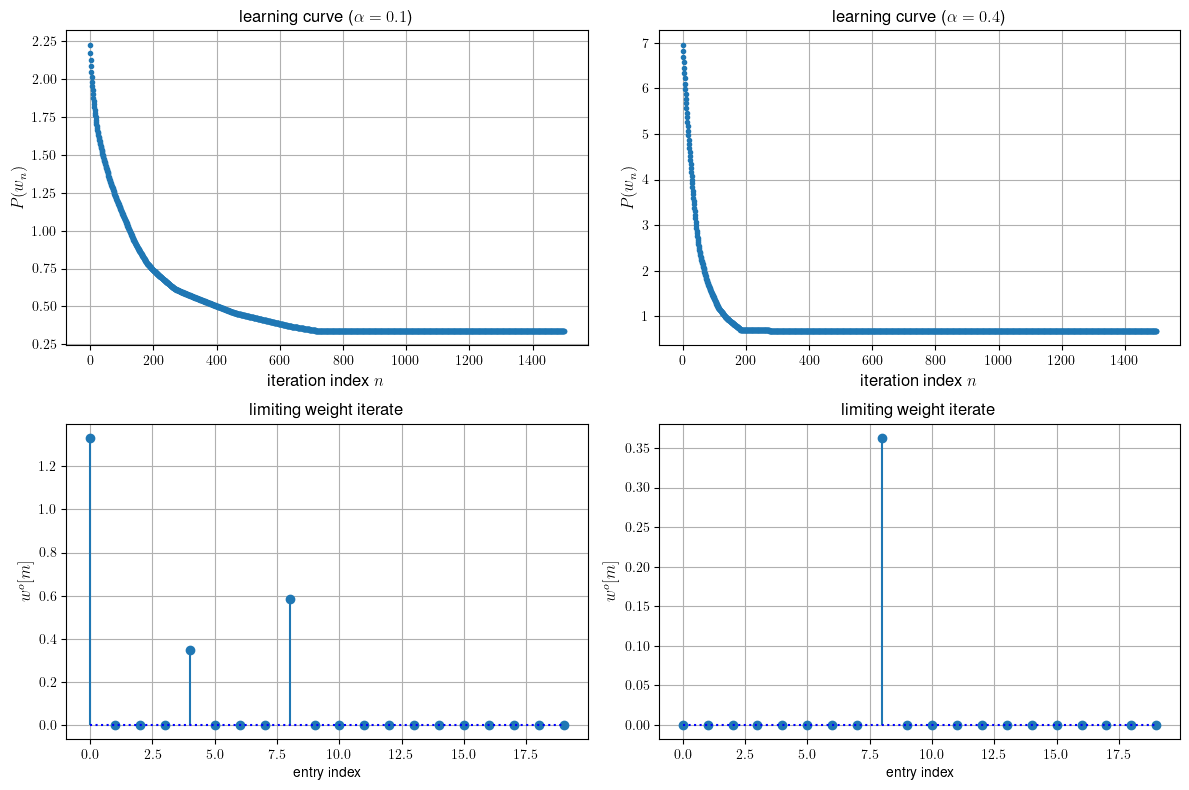

In [24]:
# l1-regularized logistic function
# Illustrating sparsity induced by l1-regularization
# P(w) = alpha\|w\|_1 + ln(1+exp(-gamma*h'*w))

alpha1 = 0.1 # comparing two alpha's
alpha2 = 0.4

gamma=1
mu = 0.03
M = 20
h = np.random.rand(M).reshape(-1,1)

N = 1500 #number of iterations

w = np.random.randn(M).reshape(-1,1)  # initial condition
J1 = np.zeros(N).reshape(-1,1) # P(w) for alpha1
J2 = np.zeros(N).reshape(-1,1) # P(w) for alpha2
winit = w.copy()

w1=w.copy() #same initial condition
w2=w.copy()

for n in range(N):
    a1 = np.exp(-gamma * h.T @ w1)
    J1[n] = alpha1 * np.linalg.norm(w1, 1) + np.log(1 + a1)
    
    a2 = np.exp(-gamma * h.T @ w2)
    J2[n] = alpha2 * np.linalg.norm(w2, 1) + np.log(1 + a2)
    
    z1 = w1 + mu * gamma * h * (1 / (1 + (1 / a1)))
    parameter = mu * alpha1
    w1 = soft_threshold(z1, parameter)
    
    z2 = w2 + mu * gamma * h * (1 / (1 + (1 / a2)))
    parameter = mu * alpha2
    w2 = soft_threshold(z2, parameter)
    
ws1 = w1.copy()
ws2 = w2.copy()

print('step size \n', mu)
print('number of iterations \n', N)
print('alpha \n', alpha)
print('dimension of model \n', M)

a1 = np.exp(-gamma * h.T @ ws1)
a2 = np.exp(-gamma * h.T @ ws2)

print('limit values from iteration')
Ps1 = alpha1 * np.linalg.norm(ws1, 1) + np.log(1 + a1)
Ps2 = alpha2 * np.linalg.norm(ws2, 1) + np.log(1 + a2)
print(Ps1[0,0], Ps2[0,0])

# Figure 3 - Learning curves for proximal gradient algorithm
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(range(N), J1, '.')
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$P(w_n)$', fontsize=12)
plt.title('learning curve ($\\alpha=0.1$)', fontsize=12)
plt.grid()

plt.subplot(222)
plt.plot(range(N), J2, '.')
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$P(w_n)$', fontsize=12)
plt.title('learning curve ($\\alpha=0.4$)', fontsize=12)
plt.grid()

plt.subplot(223)
plt.stem(ws1, basefmt="b:")
plt.xlabel('entry index')
plt.ylabel('$w^o[m]$', fontsize=12)
plt.title('limiting weight iterate', fontsize=12)
plt.axis('tight')
plt.grid()

plt.subplot(224)
plt.stem(ws2, basefmt="b:")
plt.xlabel('entry index')
plt.ylabel('$w^o[m]$', fontsize=12)
plt.title('limiting weight iterate', fontsize=12)
plt.axis('tight')
plt.grid()

plt.tight_layout()
plt.show()

**Figure 11.3** (*Top*) Learning curves for the proximal gradient recursion ($11.62$) using $\mu=0.03$ when applied to $P(w)=\alpha\|w\|_1+\ln(1+e^{-\gamma h^{\sf T} w})$ using  $\alpha=0.1$ and $\alpha=0.4$.  We use $\gamma=1$ and generate a random $h$ with entries selected uniformly from within the interval $[-1,1]$. (*Bottom*) Form of resulting minimizers, $w^o$, for both choices of $\alpha$. Observe how the minimizer $w^o$ is more sparse for $\alpha=0.4$ than for $\alpha=0.1$.

Figure$~11.3$ illustrates the influence of the parameter $\alpha$ on the sparsity of the minimizer $w^o$. We set $\rho=0$ and plot the learning curves and the resulting minimizers for $P(w)$ with $w\in\mathbb{R}^{20}$, i.e., $M=20$. We continue to use $\gamma=1$ but generate a random $h$ with entries selected uniformly from within the interval $[-1,1]$. The curves in the figure are the result of running the proximal gradient recursion ($11.62$) for $1500$ iterations using $\mu=0.03$. The learning curves tend toward the minimum values $P(w^o)\approx 0.3747$ for $\alpha=0.1$ and $P(w^o)\approx 0.6924$ for $\alpha=0.4$. Observe how the minimizer $w^o$ is more sparse for $\alpha=0.4$ than for $\alpha=0.1$.

## Example 11.7 (LASSO or basis pursuit)

Consider the optimization problem

$$
w^o = \text{argmin} \; \Bigl\{ P(w) \triangleq \alpha \|w\|_1 + \|d - Hw\|^2 \Bigr\} \tag{11.66}
$$

where $d\in\mathbb{R}^{N\times 1}$ and $H\in\mathbb{R}^{N\times M}$. We will encounter this problem later when we study sparsity-inducing solutions and, in particular, the LASSO and basis pursuit algorithms. The function $E(w)=\|d-Hw\|^2$ is differentiable everywhere with

$$
\nabla_{w^{\sf T}}\;E(w)\;=\;-2H^{\sf T} (d-Hw)\tag{11.67}
$$

so that the proximal gradient recursion ($11.53$) reduces to

$$
\left\{\begin{array}{lcl} z_{n}&=&w_{n-1}\;+\;2\mu H^{\sf T} (d-Hw_{n-1})\\
w_{n}&=& \mathbb{T}_{\mu\alpha}(z_n)
\end{array}\right. \tag{11.68}
$$

wait...
initial random condition
step size 
 0.001
number of iterations 
 400
alpha 
 0.5
limit point 
 0.011984482847144012 -0.013761731890330246
limit value
50.290062334919156


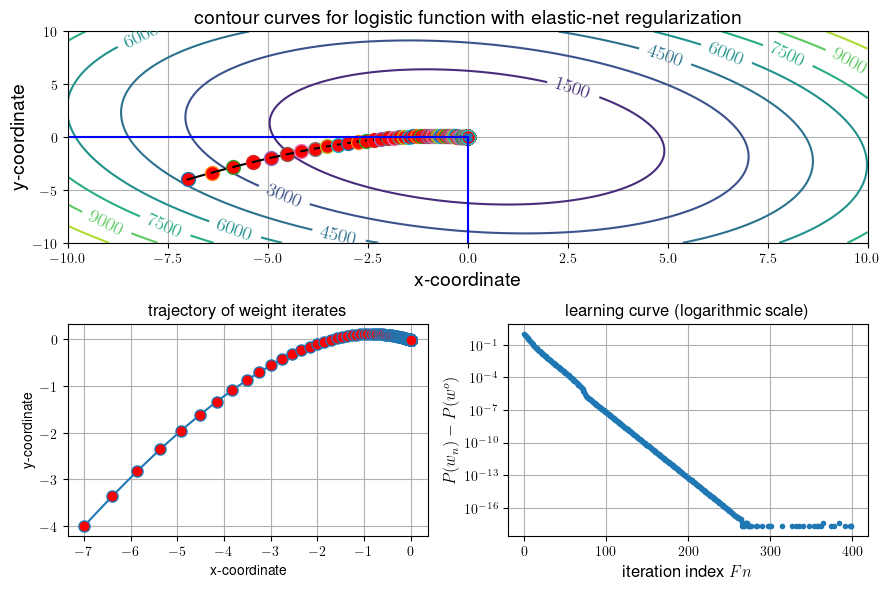

In [25]:
# LASSO: alpha \|w\|_1 + \|d-Hw\|^2

alpha = 0.5 # regularization parameter
mu = 0.001  # step-size
NN = 50       # number of data points

M = 2  
d = np.random.randn(NN,1)
H = np.random.randn(NN,M)

# evaluating the LASSO risk for plotting purposes
k = -1
ss = 0.01 # step for the mesh
J = np.zeros((int(20 / ss + 1), int(20 / ss + 1))) # initialize the vector

print('wait...')

for w1 in np.arange(-10, 10+ss, ss):
    k += 1
    m = -1
    for w2 in np.arange(-10, 10+ss, ss):
        m += 1
        w = np.array([w1,w2]).reshape(-1,1)
        J[k,m] = alpha * np.linalg.norm(w,1) + np.linalg.norm(d-np.dot(H,w))**2

## figure 4 (contour curves for LASSO or basis pursuit)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

fig = plt.figure(figsize=(9,6))

ax1 = fig.add_subplot(211)
contour = ax1.contour(np.arange(-10, 10 + ss, ss), np.arange(-10, 10 + ss, ss), J, levels=10)
ax1.clabel(contour, fontsize=14, inline=True)
ax1.set_xlabel(r'x-coordinate', fontsize=14)
ax1.set_ylabel(r'y-coordinate', fontsize=14)
ax1.set_title('contour curves for logistic function with elastic-net regularization', fontsize=14)
ax1.grid(True)

print('initial random condition')
w = np.array([10*(np.random.rand()-1), 10*(np.random.rand()-1)]).reshape(-1,1)

N = 400 # number of iterations

Wx = np.zeros(N).reshape(-1,1) # save x-coordinate of iterates
Wy = np.zeros(N).reshape(-1,1) # save y-coordinates
P  = np.zeros(N).reshape(-1,1)  # learning curve

for n in range(N):
    Wx[n] = w[0] # saving the entries for plotting
    Wy[n] = w[1]
    ax1.plot(w[0], w[1], 'o', markerfacecolor='r', markersize=10)
    pw = w.copy() # save previous w for plotting purpose
    
    P[n] = alpha * np.linalg.norm(w,1) + np.linalg.norm(d-np.dot(H,w))**2
    
    a = 2 * np.dot(H.T, (d - np.dot(H, w))) # running proximal gradient
    
    z = w + mu * a
    parameter = mu * alpha
    w = soft_threshold(z, parameter)  # updated w
    
    plt.plot([pw[0], w[0]], [pw[1], w[1]], 'k-')  # a segment linking previous w to current w

    
# limit point
ws=w.copy()
print('step size \n', mu)
print('number of iterations \n', N)
print('alpha \n', alpha)
print('limit point \n', ws[0,0], ws[1,0])
print('limit value')
Ps = alpha * np.linalg.norm(w, 1) + np.linalg.norm(d - np.dot(H, w)) ** 2
print(Ps)
      
ax1.plot(ws[0], ws[1], 'X') # limit point
P1 = [ws[0], ws[0]]
P2 = [-10, ws[1]]
ax1.plot(P1, P2, '-b')
P1 = [-10, ws[0]]
P2 = [ws[1], ws[1]]
ax1.plot(P1, P2, '-b')
      
plt.subplot(223)
plt.plot(Wx, Wy, '-o', markerfacecolor='r', markersize=8)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('trajectory of weight iterates')
plt.axis('tight')
plt.grid()

plt.subplot(224)
plt.semilogy(range(N), (P - Ps) / max(P - Ps), '.')
plt.xlabel('iteration index $Fn$', fontsize=12)
plt.ylabel('$P(w_n)-P(w^o)$', fontsize=12)
plt.title('learning curve (logarithmic scale)')
plt.axis('tight')
plt.grid()

plt.tight_layout()
plt.show()

**Figure 11.4** (*Top*) Contour curves of  a regularized LASSO function $P(w)$ of the form ($11.66$) with $\alpha=0.5$, $M=2$, and $N=50$. The quantities $(d,H)$ are generated randomly; their entries are zero-mean Gaussian distributed with unit variance.  The successive locations of the weight iterates generated by the proximal gradient recursion  ($11.68$) are shown in circles moving from left to right toward the minimizer location of $P(w)$. (*Bottom left*) Trajectory of the successive weight iterates in $\mathbb{R}^2$, moving from left to right, as they approach the location of the minimizer $w^o$ of $P(w)$. (*Bottom right*) Normalized learning curve in logarithmic scale.

Figure$~11.4$ plots the contour curves for  $P(w):\mathbb{R}^{2}\rightarrow \mathbb{R}$  with $\alpha=0.5$, $M=2$, and $N=50$. The quantities $\{d,H\}$ are generated randomly; their entries are zero-mean Gaussian distributed with unit variance. The location of the minimizer $w^o$ for $P(w)$ and the corresponding minimum value are determined to be approximately

$$
w^o\approx \begin{bmatrix} 0.0205\\0
\end{bmatrix},\;\;\;P(w^o)\approx 42.0375 \tag{11.69}
$$

These values are obtained by running the proximal gradient recursion ($11.68$) for $400$ iterations starting from a random initial condition $w_{-1}$ and using $\mu=0.001$. The top plot in the figure illustrates the trajectory of the successive weight iterates, moving from left to right, in relation to the contour curves of $P(w)$; this same trajectory is shown in the lower left plot of the same figure. The lower right plot shows the evolution of the normalized learning curve $P(w_n)-P(w^o)$ over the iteration index $n$ in logarithmic scale  according to the same construction from ($11.65$). 
